# Ranking between airport hubs 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graph.read_network import generate_network_without_edge_weight

In [2]:
G = generate_network_without_edge_weight("../data/data.csv")

In [3]:
node_ranking = sorted([
    (node, degree) for (node, degree) in G.degree()
], key=lambda x : x[1], reverse=True)

In [4]:
def ranking_airports(G: nx.DiGraph, top_value: int = 10):
    top_values = node_ranking[:top_value]
    airports, count = zip(*top_values)
    
    # Criar o gráfico de barras
    plt.bar(airports, count, color=np.random.rand(len(airports), 3))

    # Definir título e rótulos
    plt.title("Airport Ranking Visualization")
    plt.xlabel("Airport code")
    plt.ylabel("Number of connections")
    plt.xticks(rotation=45)

    # Mostrar o gráfico
    plt.show()

def ranking_airports_connection(G: nx.DiGraph, top_value: int = 10):
    G1 = nx.Graph()
    top_values = node_ranking[:top_value]
    node_top_values = [node for node, _ in top_values]

    for node in node_top_values:
        G1.add_node(node)
        for aux in node_top_values:
            if node == aux:
                continue
            
            if not G.has_edge(node, aux) or not G.has_edge(aux, node):
                continue

            if not G1.has_edge(node, aux) and node != aux:
                G1.add_edge(node, aux)

    N = G1.number_of_nodes()
    L = G1.number_of_edges()

    is_complete = L == (N*(N-1)//2)

    print("Is the network complete? {}".format(is_complete))

    return G1

def print_network(G: nx.DiGraph):
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.9, seed=70) 
    nx.draw(G, pos, node_size=1000, with_labels=True)
    plt.show()

## Top 10 airport based on number of flights

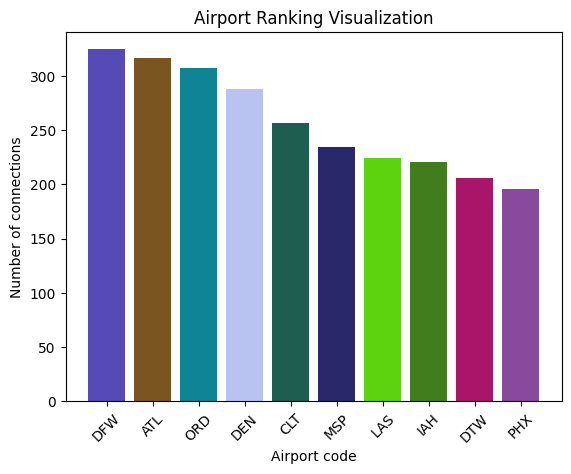

Is the network complete? True


In [5]:
ranking_airports(G, 10)
G1 = ranking_airports_connection(G, 10)

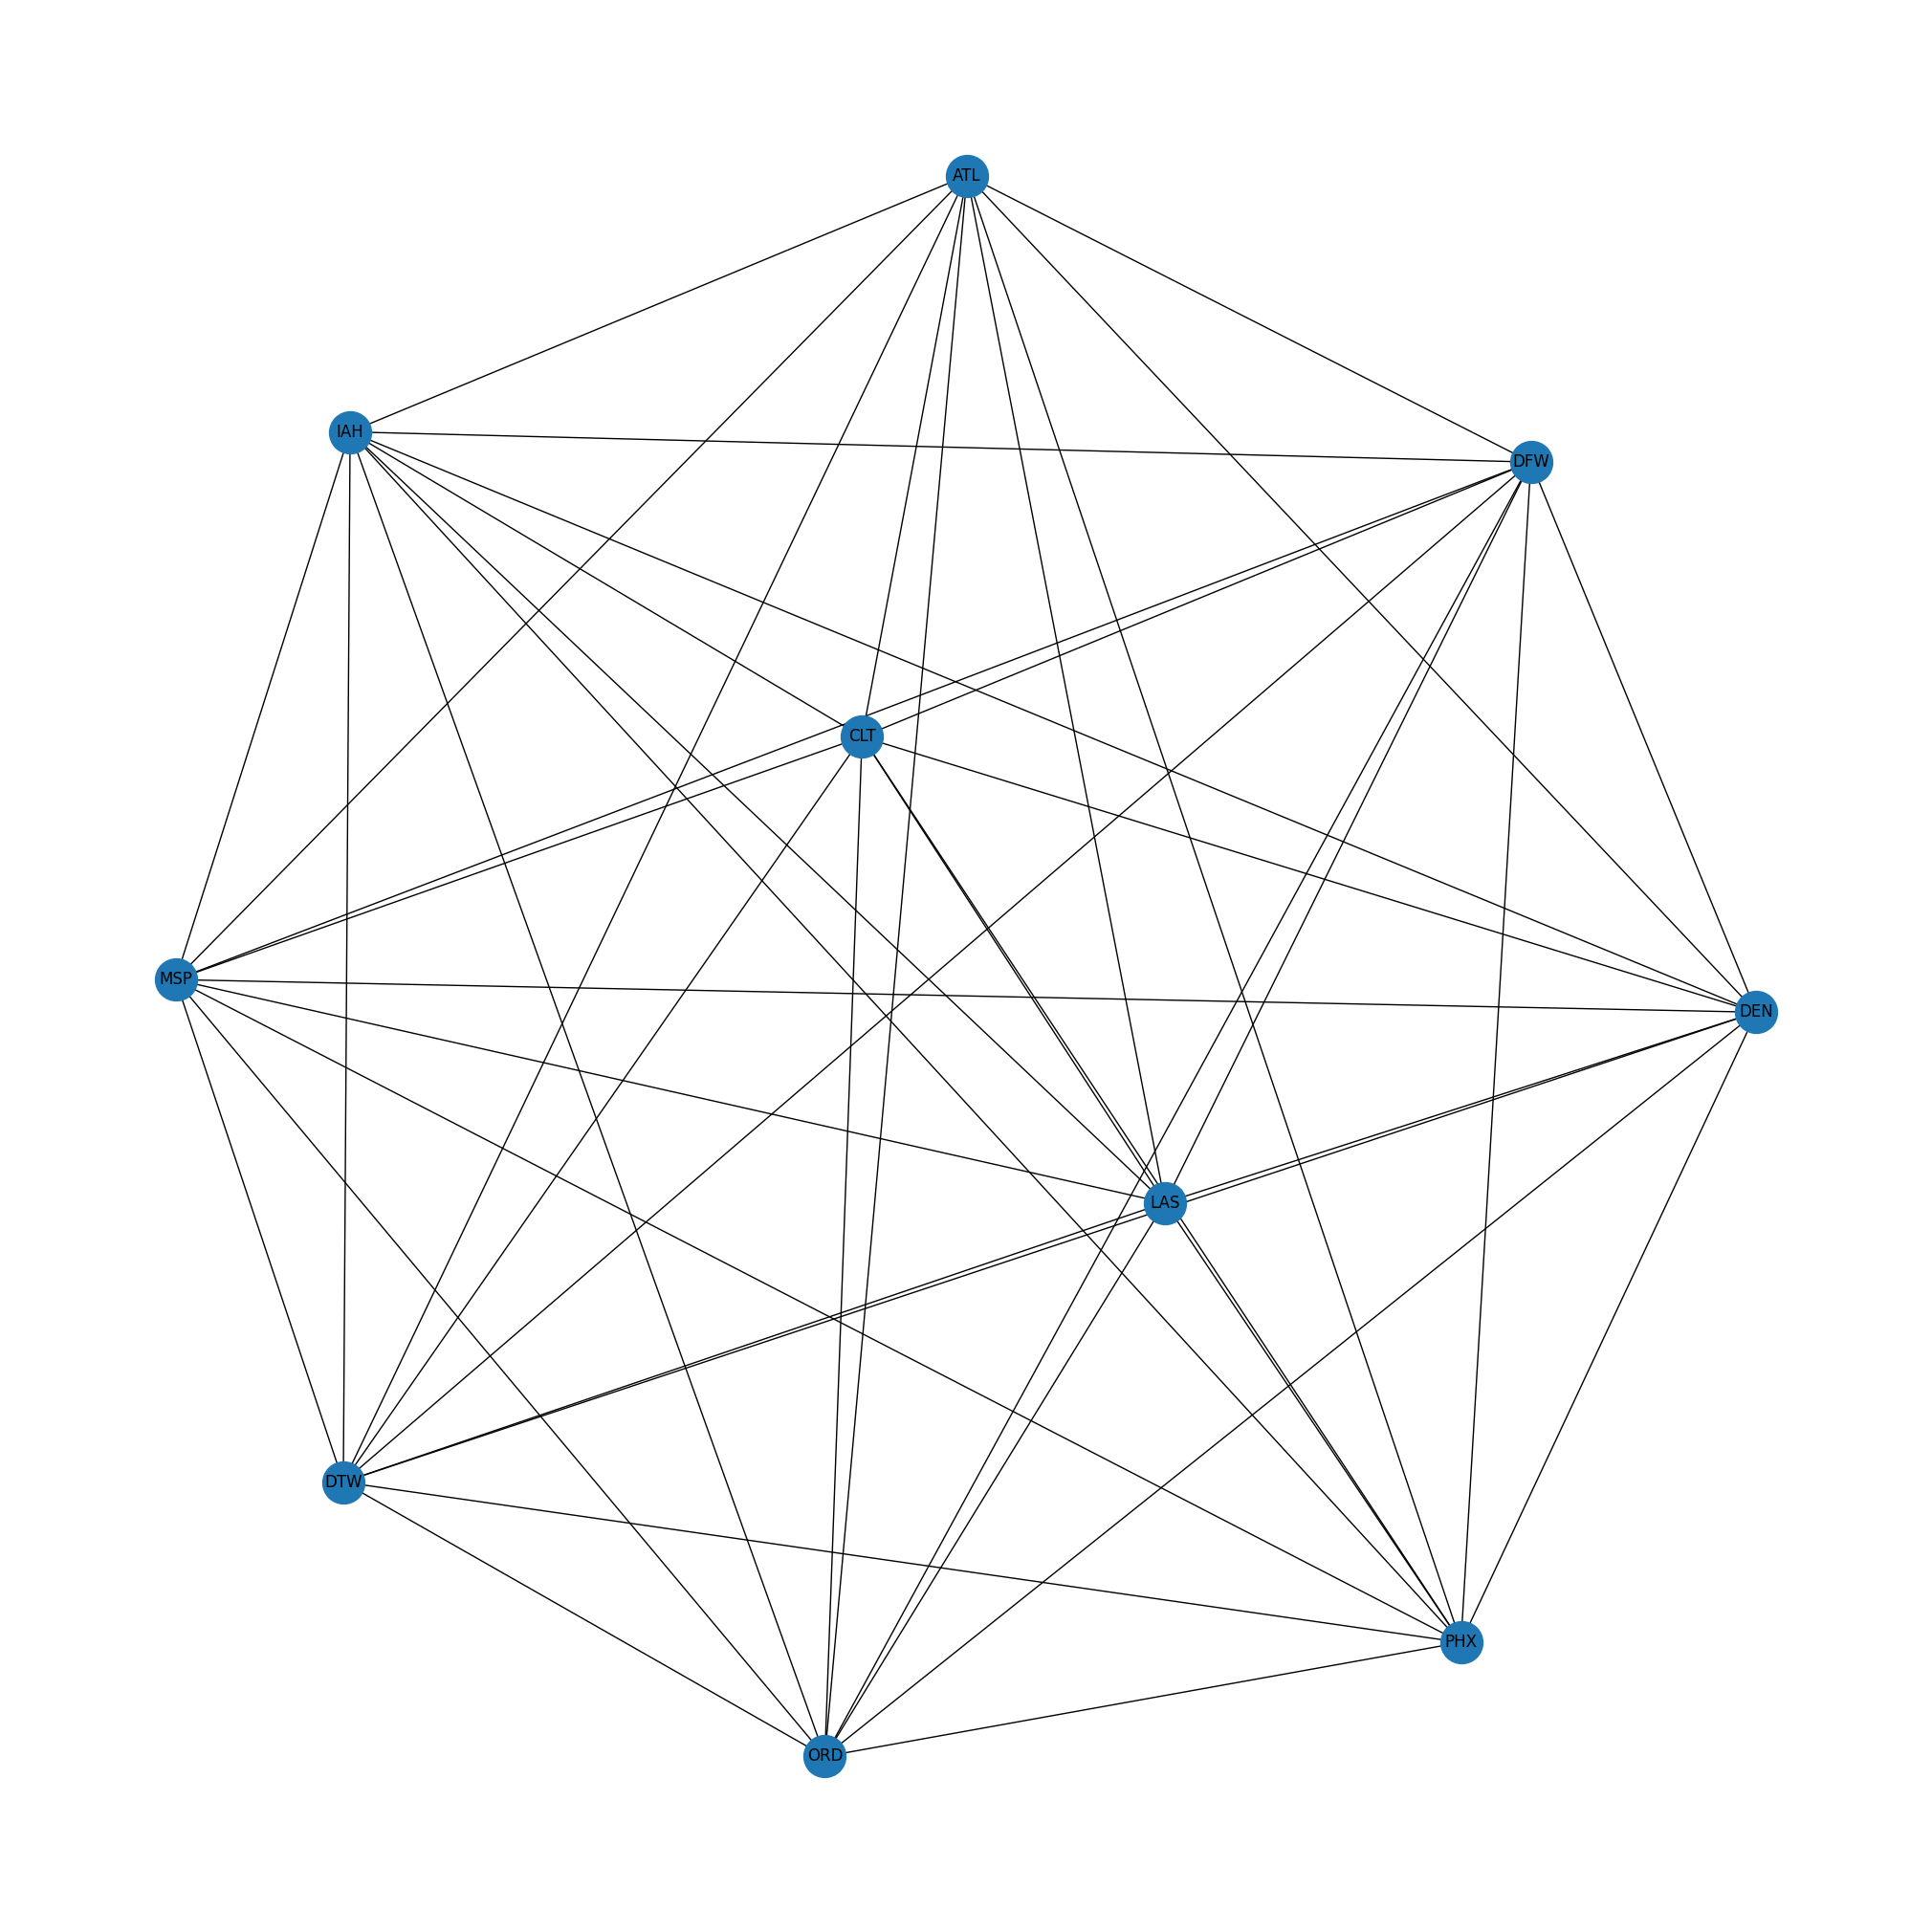

[('DFW', 9), ('ATL', 9), ('ORD', 9), ('DEN', 9), ('CLT', 9), ('MSP', 9), ('LAS', 9), ('IAH', 9), ('DTW', 9), ('PHX', 9)]


In [6]:
## Connection between nodes
print_network(G1)
print(G1.degree())

## Top 20 airport based on number of flights

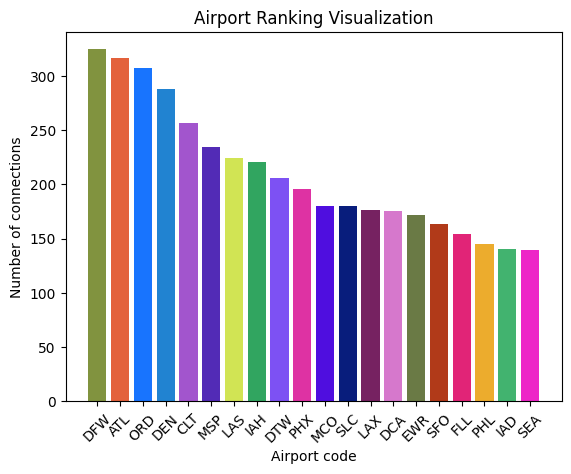

Is the network complete? False


In [7]:
ranking_airports(G, 20)
G2 = ranking_airports_connection(G, 20)

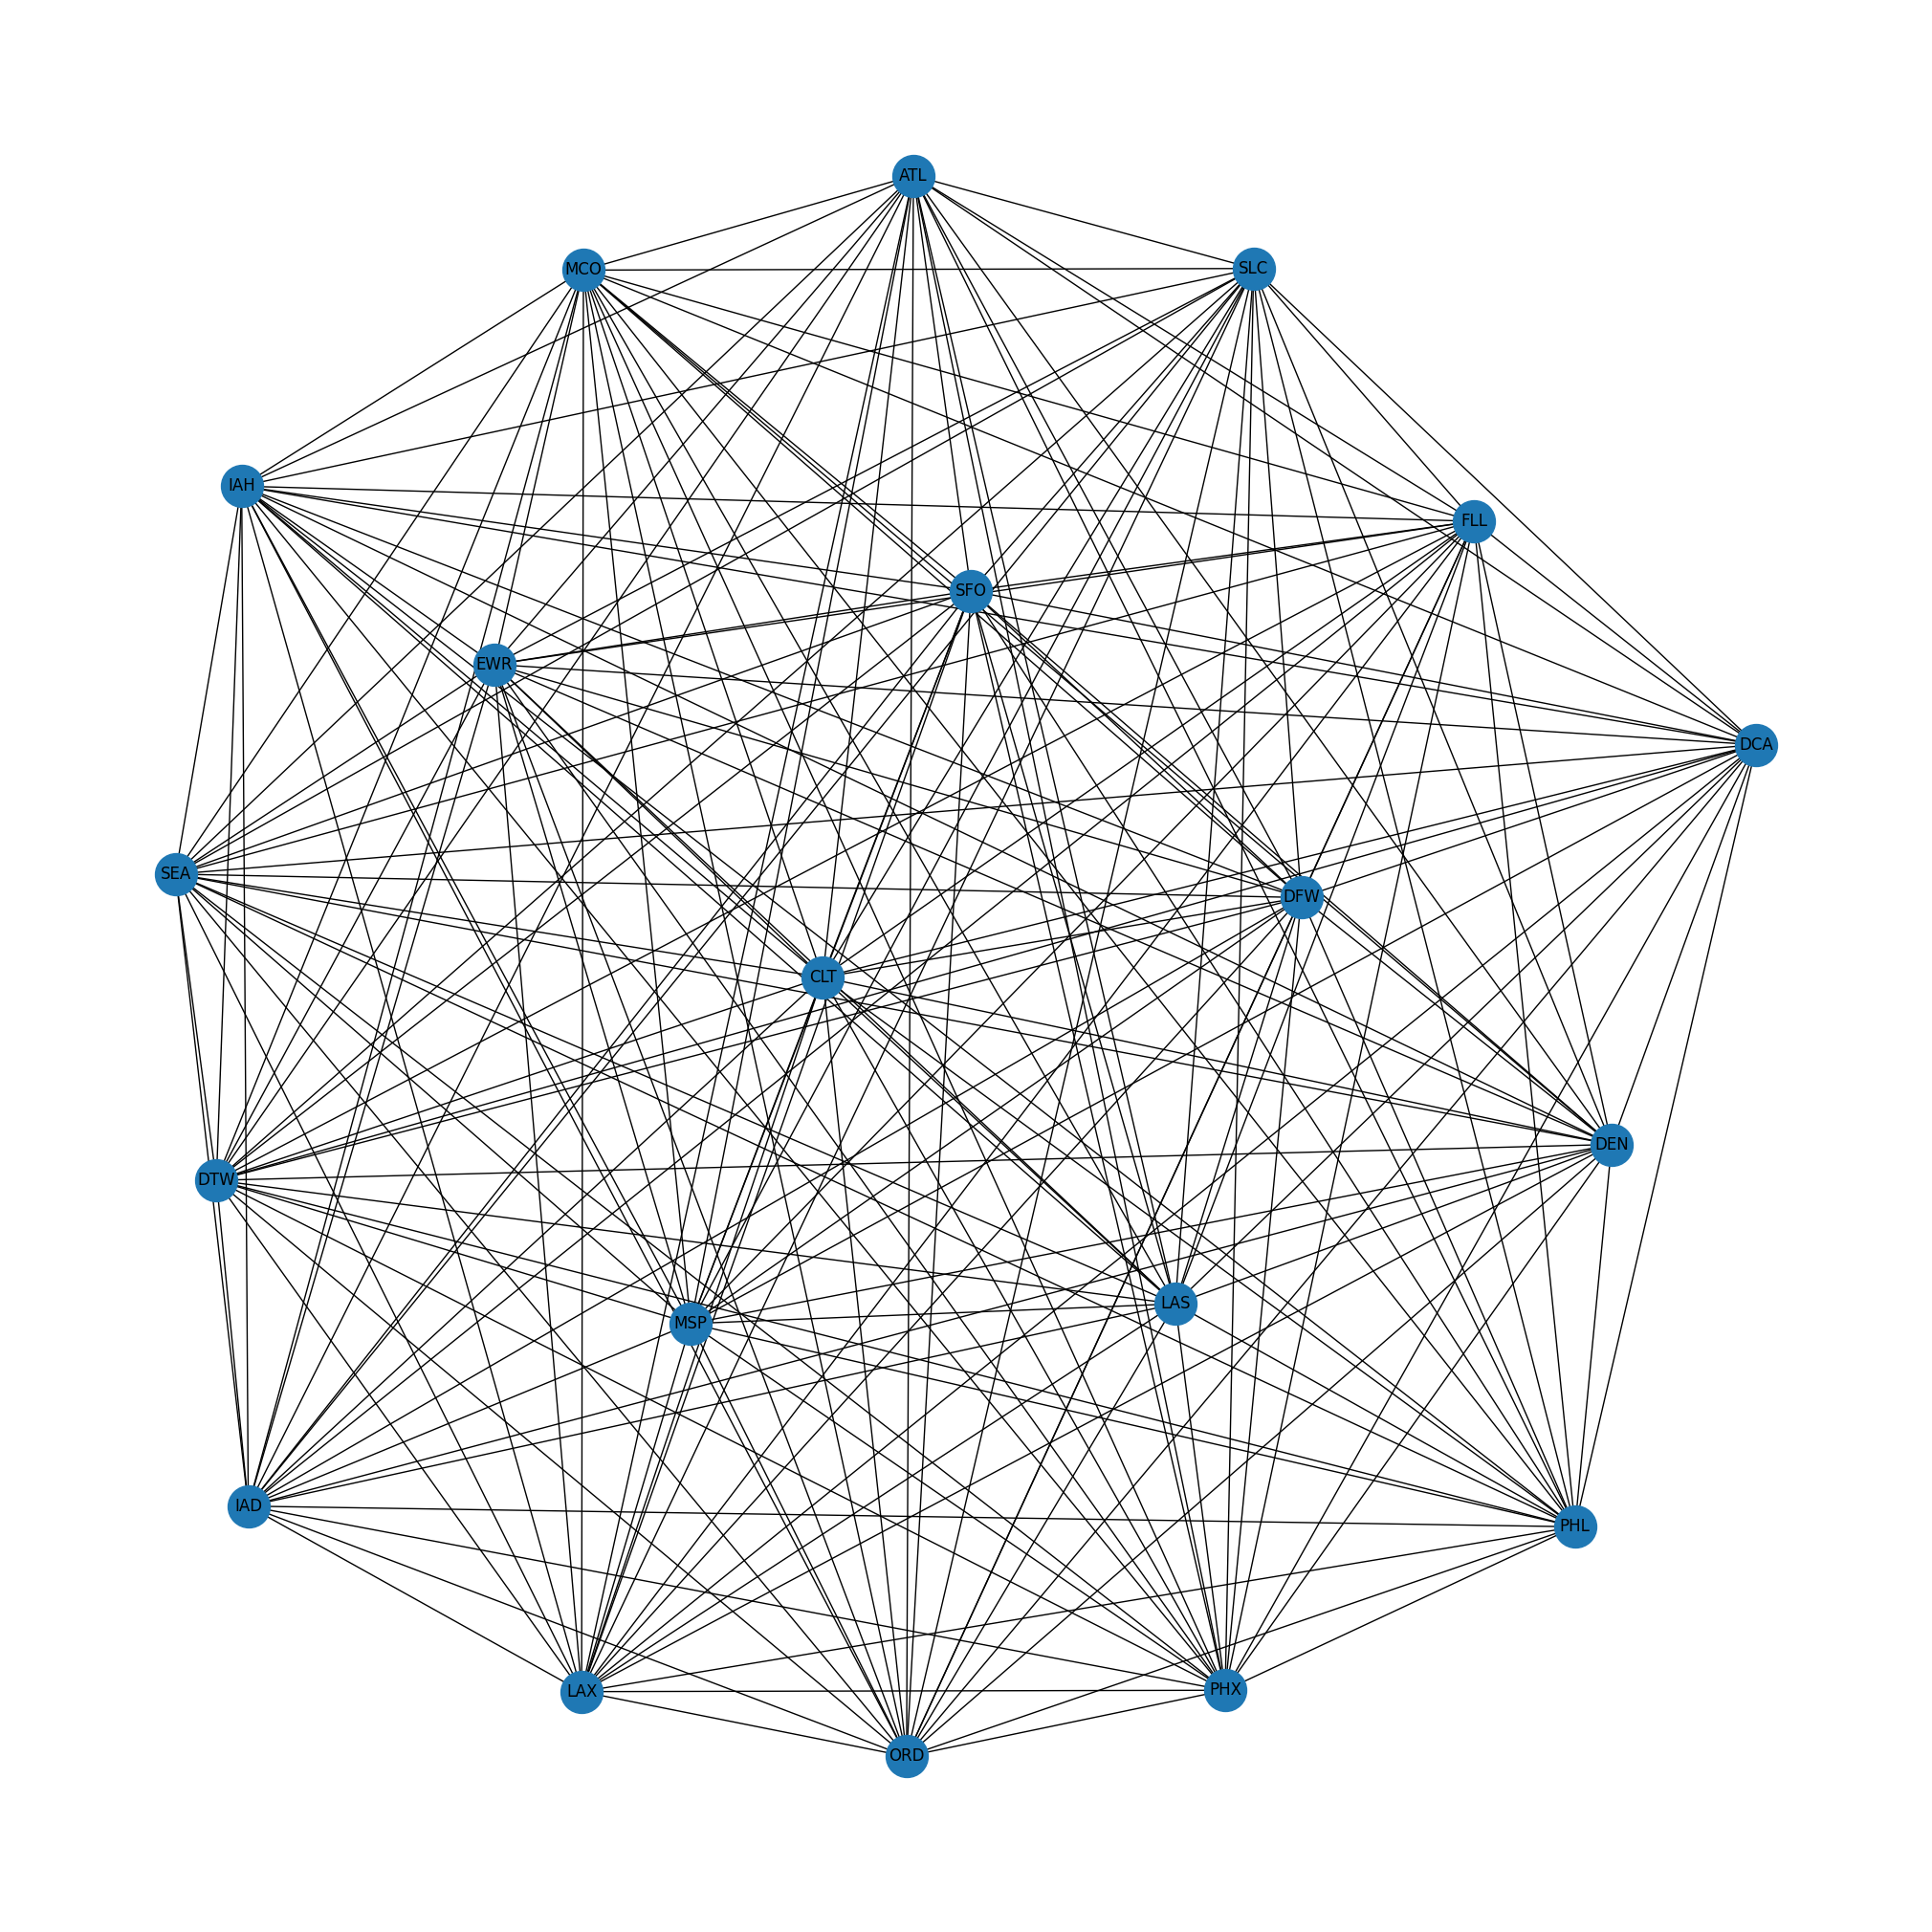

In [8]:
print_network(G2)

# Top 30 airports

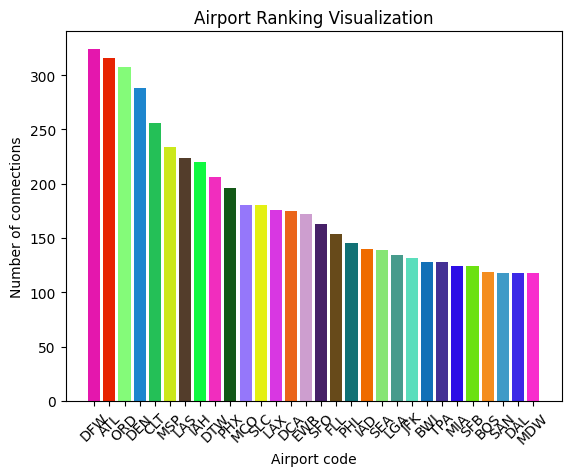

Is the network complete? False
Graph with 30 nodes and 370 edges


In [9]:
ranking_airports(G, 30)
top_30 = ranking_airports_connection(G, 30)

print(top_30)

In [10]:
from extraction import airport_api

{'name': 'Albany International Airport', 'city': 'Albany', 'code': 'ALB', 'lat': '42.74829864501953', 'lon': '-73.80169677734375'}


In [11]:
import time 

nodes = G.nodes()

coordinates = {}

In [22]:
for node in list(nodes)[100:]:
    result = airport_api.find_airport_info(node)

    if result is not None:
        try:
            coordinates[node] = {
                "name": node,
                "latitude": result["lat"],
                "longitude": result["lon"]
            }
        except:
            print(node, result)
            # SJU STT STX BQN GUM SPN PSE PPG 
    time.sleep(3)

STX {}
BQN {}
GUM {}
SPN {}
PSE {}
PPG {}


In [23]:
len(coordinates)

338

In [28]:
print("Name,Longitude,Latitude")
for _, values in coordinates.items():
    print("{},{},{}".format(values["name"], values["longitude"], values["latitude"]))

Name,Longitude,Latitude
MSP,-93.221802,44.882
MKE,-87.89659881591797,42.947200775146484
ATL,-84.428101,33.6367
PHF,-76.49299622,37.13190079
CLE,-81.8498001099,41.4117012024
RDU,-78.7874984741211,35.877601623535156
RIC,-77.3197021484375,37.50519943237305
DTW,-83.35340118408203,42.212398529052734
OMA,-95.894096,41.3032
BOS,-71.00520325,42.36429977
BTR,-91.149597,30.533199
ILM,-77.90260314941406,34.270599365234375
MOT,-101.27999877929688,48.2593994140625
CMH,-82.891899,39.998001
CVG,-84.6678009033,39.0488014221
MSN,-89.3375015258789,43.13990020751953
CAE,-81.11949920654297,33.93880081176758
OAJ,-77.61209869380001,34.8292007446
JFK,-73.77890015,40.63980103
LGA,-73.87259674,40.77719879
BUF,-78.73220062,42.94049835
ORF,-76.20120239257812,36.89459991455078
BTV,-73.15329742429999,44.471900939899996
CWA,-89.6668014526,44.7775993347
CAK,-81.44219970703125,40.916099548339844
JAN,-90.0758972168,32.3111991882
DCA,-77.037697,38.8521
DSM,-93.66310119628906,41.534000396728516
TYS,-83.9940033,35.811000

In [28]:
for node in G2.nodes():
    node_coordinates = coordinates[node]
    for neighbor in G2.neighbors(node):
        neighbor_coordinate = coordinates[neighbor]
        print("<Placemark>")
        print("    <name>{}-{}</name>".format(node, neighbor))
        print("    <styleUrl>#lineStyle</styleUrl>")
        print("    <LineString>")
        print("        <tessellate>1</tessellate>")
        print("        <coordinates>")
        print("            {},{},0".format(node_coordinates['longitude'], node_coordinates['latitude']))
        print("            {},{},0".format(neighbor_coordinate['longitude'], neighbor_coordinate['latitude']))
        print("        </coordinates>")
        print("    </LineString>")
        print("</Placemark>")

<Placemark>
    <name>DFW-ATL</name>
    <styleUrl>#lineStyle</styleUrl>
    <LineString>
        <tessellate>1</tessellate>
        <coordinates>
            -97.038002,32.896801,0
            -84.428101,33.6367,0
        </coordinates>
    </LineString>
</Placemark>
<Placemark>
    <name>DFW-ORD</name>
    <styleUrl>#lineStyle</styleUrl>
    <LineString>
        <tessellate>1</tessellate>
        <coordinates>
            -97.038002,32.896801,0
            -87.9048,41.9786,0
        </coordinates>
    </LineString>
</Placemark>
<Placemark>
    <name>DFW-DEN</name>
    <styleUrl>#lineStyle</styleUrl>
    <LineString>
        <tessellate>1</tessellate>
        <coordinates>
            -97.038002,32.896801,0
            -104.672996521,39.861698150635,0
        </coordinates>
    </LineString>
</Placemark>
<Placemark>
    <name>DFW-CLT</name>
    <styleUrl>#lineStyle</styleUrl>
    <LineString>
        <tessellate>1</tessellate>
        <coordinates>
            -97.038002,32.896801,0
 